In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.ensemble import GradientBoostingRegressor
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
dvf = pd.read_csv('./data/sample_2020.csv', low_memory=False)  


In [14]:
isf = pd.read_csv('./data/isf_2020.csv')
isf.head()

,Région,Départements,Code commune (INSEE),Commune,nombre de redevables,patrimoine moyen en millions d'euros,impôt moyen en milliers d'euros
0,AUVERGNE-RHONE-ALPES,DROME,26 362,VALENCE,61,2.4,9.2
1,AUVERGNE-RHONE-ALPES,HAUTE-SAVOIE,74 010,ANNECY,507,2.0,7.5
2,AUVERGNE-RHONE-ALPES,HAUTE-SAVOIE,74 281,THONON-LES-BAINS,90,2.1,8.9
3,AUVERGNE-RHONE-ALPES,ISERE,38 185,GRENOBLE,172,2.2,8.8
4,AUVERGNE-RHONE-ALPES,LOIRE,42 218,SAINT ETIENNE,78,1.9,6.1


In [15]:
crimes = pd.read_csv('./data/crimes.csv')   
crimes.drop(columns=['Unnamed: 0'], inplace=True)
crimes.rename(columns={" Libellé Département ": "Départements"}, inplace=True)
crimes.head()

,Département,Départements,Population,Nombre de logements,"Vols avec armes (armes à feu, armes blanches ou par destination)",%,Vols violents sans arme,% .1,Vols sans violence contre des personnes,% .2,Coups et blessures volontaires (sur personnes de 15 ans ou plus),% .3,Cambriolages de logement,% .4,Vols de véhicules (automobiles ou deux roues motorisés),% .5,Vols dans les véhicules,% .6,Vols d'accessoires sur véhicules,% .7
0,01,AIN,"626,127","293,836",31,0.0,140,0.0,"3,235",0.5,"1,436",0.2,"2,350",0.4,"1,308",0.2,"1,459",0.2,970,0.2
1,02,AISNE,"539,783","260,198",40,0.0,187,0.0,"2,867",0.5,"1,908",0.4,"1,573",0.3,"1,102",0.2,"1,139",0.2,763,0.1
2,03,ALLIER,"343,062","204,002",18,0.0,95,0.0,"1,899",0.6,866,0.3,"1,063",0.3,542,0.2,467,0.1,353,0.1
3,04,ALPES DE HAUTE PROVENCE,"161,588","123,410",11,0.0,86,0.1,"1,353",0.8,483,0.3,607,0.4,357,0.2,772,0.5,230,0.1
4,05,HAUTES ALPES,"139,883","131,268",9,0.0,60,0.0,"1,411",1.0,431,0.3,348,0.2,240,0.2,379,0.3,124,0.1


In [16]:
isf.replace(',','', regex=True, inplace=True)
isf.replace('-','', regex=True, inplace=True)
isf.replace("'",'', regex=True, inplace=True)
isf.replace(" ",'', regex=True, inplace=True)

isf['nombre de redevables'].astype('float')

0        61.0
1       507.0
2        90.0
3       172.0
4        78.0
5       114.0
6        63.0
7       214.0
8      2012.0
9       170.0
10       63.0
11      108.0
12       89.0
13       67.0
14      110.0
15      176.0
16       94.0
17       80.0
18      514.0
19      175.0
20      145.0
21       84.0
22      181.0
23      141.0
24      162.0
25       61.0
26      655.0
27       90.0
28       81.0
29      254.0
30      187.0
31      129.0
32       60.0
33       59.0
34      100.0
35       55.0
36      257.0
37      331.0
38      133.0
39     1846.0
40      162.0
41      110.0
42       92.0
43      112.0
44      261.0
45      192.0
46      377.0
47       77.0
48      165.0
49      380.0
50      633.0
51       67.0
52      379.0
53      198.0
54       98.0
55     3566.0
56       70.0
57      134.0
58      666.0
59      625.0
60      261.0
61      262.0
62      148.0
63      539.0
64      310.0
65      778.0
66      872.0
67     1663.0
68     2739.0
69     4166.0
70     2169.0
71    

In [17]:
isf = isf.groupby(['Départements'])['impôt moyen en milliers d\'euros'].agg('mean')
isf = pd.DataFrame(isf)
isf.reset_index(inplace=True)

In [18]:
crimes.replace(',','', regex=True, inplace=True)
crimes.replace('-','', regex=True, inplace=True)
crimes.replace("'",'', regex=True, inplace=True)
crimes.replace(" ",'', regex=True, inplace=True)


for col in [' Population ', ' Nombre de logements ', ' Vols avec armes (armes à feu, armes blanches ou par destination) ', ' % ', ' Vols violents sans arme ', ' % .1', ' Vols sans violence contre des personnes ', ' % .2', ' Coups et blessures volontaires (sur personnes de 15 ans ou plus) ', ' % .3', ' Cambriolages de logement ', ' % .4', ' Vols de véhicules (automobiles ou deux roues motorisés) ', ' % .5', ' Vols dans les véhicules ', ' % .6', ' Vols d\'accessoires sur véhicules ', ' % .7']:
    
    crimes[col] = crimes[col].apply(pd.to_numeric,errors='coerce')

In [19]:
crimes.fillna(0, inplace=True)
crimes['all_crimes'] = crimes[' Vols avec armes (armes à feu, armes blanches ou par destination) '] + crimes[' Vols violents sans arme '] + crimes[' Vols sans violence contre des personnes '] + crimes[' Coups et blessures volontaires (sur personnes de 15 ans ou plus) '] + crimes[' Cambriolages de logement '] + crimes[' Vols de véhicules (automobiles ou deux roues motorisés) '] + crimes[' Vols dans les véhicules '] + crimes[" Vols d'accessoires sur véhicules "]

In [20]:
crimes['crime_rate'] = crimes['all_crimes'] / crimes[' Population ']

In [21]:
crimes.drop(columns=[' Population ',
       ' Nombre de logements ',
       ' Vols avec armes (armes à feu, armes blanches ou par destination) ',
       ' % ', ' Vols violents sans arme ', ' % .1',
       ' Vols sans violence contre des personnes ', ' % .2',
       ' Coups et blessures volontaires (sur personnes de 15 ans ou plus) ',
       ' % .3', ' Cambriolages de logement ', ' % .4',
       ' Vols de véhicules (automobiles ou deux roues motorisés) ', ' % .5',
       ' Vols dans les véhicules ', ' % .6',
       ' Vols d\'accessoires sur véhicules ', ' % .7', 'all_crimes'], inplace=True)

In [22]:
isf.head()

,Départements,impôt moyen en milliers d'euros
0,ALPESMARITIMES,11.727273
1,AUDE,7.700000
2,BASRHIN,10.200000
3,BOUCHESDURHONE,8.316667
4,CALVADOS,9.200000


In [23]:
# merge datasets
extra_data =  pd.merge(crimes, isf, how='left', on='Départements')

In [24]:
extra_data.head()

,Département,Départements,all_crimes,crime_rate,impôt moyen en milliers d'euros
0,01,AIN,10929.0,0.017455,NaN
1,02,AISNE,9579.0,0.017746,NaN
2,03,ALLIER,5303.0,0.015458,NaN
3,04,ALPESDEHAUTEPROVENCE,3899.0,0.024129,NaN
4,05,HAUTESALPES,3002.0,0.021461,8.5


In [95]:
# using linear reg to fill missing values

traindf = extra_data[extra_data['impôt moyen en milliers d\'euros'].isnull()==False]
testdf = extra_data[extra_data['impôt moyen en milliers d\'euros'].isnull()==True]

y = traindf['impôt moyen en milliers d\'euros']

In [96]:
rfr = GradientBoostingRegressor(loss='quantile', alpha=.1,
                                n_estimators=500, max_depth=8,
                                learning_rate=.01, min_samples_leaf=2,
                                min_samples_split=2)

rfr.fit(traindf.drop(["impôt moyen en milliers d\'euros", " Département ", "Départements"], axis=1), y)
preds = rfr.predict(testdf.drop(["impôt moyen en milliers d\'euros", " Département ", "Départements"], axis=1))
testdf['impôt moyen en milliers d\'euros'] = preds

# getting index with nan values and imputing those with predictions
extra_data.loc[extra_data["impôt moyen en milliers d'euros"].isnull()] = testdf 

/tmp/ipykernel_16658/2109746169.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['impôt moyen en milliers d\'euros'] = preds


In [97]:
extra_data.rename(columns={" Département ": "code_departement"}, inplace=True)
sample_enhanced =  pd.merge(dvf, extra_data, how='left', on='code_departement')


In [98]:
sample_enhanced.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,Départements,Population,Nombre de logements,"Vols avec armes (armes à feu, armes blanches ou par destination)",%,Vols violents sans arme,% .1,Vols sans violence contre des personnes,% .2,Coups et blessures volontaires (sur personnes de 15 ans ou plus),% .3,Cambriolages de logement,% .4,Vols de véhicules (automobiles ou deux roues motorisés),% .5,Vols dans les véhicules,% .6,Vols d'accessoires sur véhicules,% .7,all_crimes,crime_rate,impôt moyen en milliers d'euros
0,2020-865553,2020-09-03,1,Vente,195000.0,23.0,NaN,RUE DES MESANGES,0646,85110.0,85051,Chantonnay,85,NaN,NaN,85051000AT0211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,114.0,4.0,S,sols,NaN,NaN,624.0,-1.060789,46.687163,VENDEE,662122,402695,16.0,0.0,136.0,0.0,4197,0.6,1430,0.2,1284,0.2,879,0.1,1730.0,0.3,609,0.1,10281.0,0.015527,9.100000
1,2020-86283,2020-09-11,1,Vente,90000.0,NaN,NaN,MERVILLES-BASSES,B045,11380.0,11232,Miraval-Cabardès,11,NaN,NaN,112320000C0420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,L,landes,NaN,NaN,11370.0,2.346111,43.387500,AUDE,365478,249801,44.0,0.0,233.0,0.1,3307,0.9,1258,0.3,2055,0.6,784,0.2,1705.0,0.5,690,0.2,10076.0,0.027569,7.700000
2,2020-311587,2020-10-13,1,Vente,83900.0,NaN,NaN,LA PLAINE,B050,34230.0,34204,Plaissan,34,NaN,NaN,342040000B0807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,AB,terrains a bâtir,NaN,NaN,346.0,3.528785,43.556141,HERAULT,1107398,672318,201.0,0.0,2176.0,0.2,19981,1.8,4561,0.4,6038,0.5,3204,0.3,6320.0,0.6,2418,0.2,44899.0,0.040545,8.840000
3,2020-452062,2020-02-12,1,Vente,130000.0,3.0,NaN,RUE DE L ISAC,0125,44810.0,44073,Héric,44,NaN,NaN,44073000AA0170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,sols,NaN,NaN,15.0,-1.654349,47.418418,LOIREATLANTIQUE,1346592,692973,219.0,0.0,1196.0,0.1,16732,1.2,3954,0.3,5977,0.4,4396,0.3,10167.0,0.8,3970,0.3,46611.0,0.034614,7.933333
4,2020-917264,2020-05-13,1,Vente,44000.0,19.0,NaN,RUE MICHEL CARRE,0500,89120.0,89086,Charny Orée de Puisaye,89,NaN,NaN,89086243ZE0087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,67.0,3.0,S,sols,NaN,NaN,500.0,3.049998,47.834505,YONNE,341814,192469,29.0,0.0,135.0,0.0,2309,0.7,1324,0.4,1050,0.3,861,0.3,800.0,0.2,582,0.2,7090.0,0.020742,7.244903


In [87]:
sample_enhanced.to_csv('data/sample_enhanced.csv', index=False)

In [99]:
df = sample_enhanced.groupby('code_departement')['crime_rate','impôt moyen en milliers d\'euros', 'valeur_fonciere'].mean()
df = pd.DataFrame(df)
df.head(50)

/tmp/ipykernel_16658/527290248.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = sample_enhanced.groupby('code_departement')['crime_rate','impôt moyen en milliers d\'euros', 'valeur_fonciere'].mean()


,crime_rate,impôt moyen en milliers d'euros,valeur_fonciere
code_departement,,,
01,0.017455,6.799815,4.990154e+05
02,0.017746,7.244903,1.444088e+05
03,0.015458,7.244903,1.372472e+05
04,0.024129,7.607844,1.644521e+05
05,0.021461,8.500000,1.561537e+05
06,0.038539,11.727273,1.298843e+06
07,0.016747,7.439736,1.352546e+05
08,0.016567,7.244903,1.104349e+05
09,0.018122,7.196549,1.164059e+05


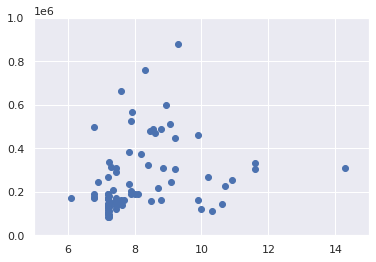

In [100]:
from scipy.stats import gaussian_kde

plt.scatter(df['impôt moyen en milliers d\'euros'], df.valeur_fonciere)
plt.xlim([5, 15])
plt.ylim([0, 1e6])

plt.show()